# Plotting directly with Matplotlib

## Objectives

After completing this lab you will be able to:

*   Create and customize basic plots directly with Matplotlib on dataset

In [3]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.4


# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

In [6]:
import requests
import pandas as pd
import io

# Define the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"

# Send a GET request to the URL
response = requests.get(URL)

# Convert the content into a BytesIO object
text = io.BytesIO(response.content)

# Read the CSV data into a pandas dataframe
df_can = pd.read_csv(text)

# Print confirmation
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [8]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [10]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [12]:
df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [18]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
#years = np.arange(1980,2014)

<hr>

# Line Plot<a id="6"></a>

A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on **axes** by calling plot function **plot()**

In [27]:
#As years is in the array format, you will be required to map it to str for plotting
#y=list(map(str, years))

#creating df with only years columns from 1980 - 2013
df_line=df_can[years]

#Applying sum to get total immigrants year-wise
total_immigrants=df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

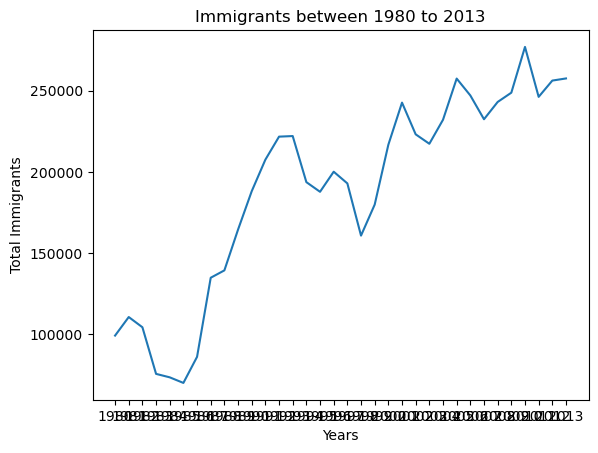

In [29]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 
#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

#### The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>However, notice how the years were not displayed because they are of type string.<br> <br>Therefore, let's change the type of the index values to integer for plotting.


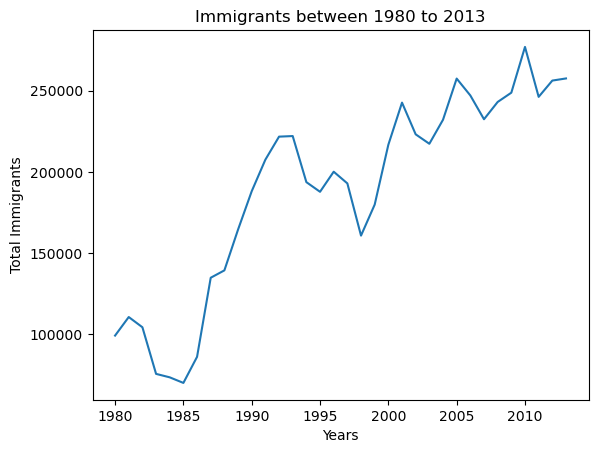

In [32]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

#### Let's now customize the above plot's appearance 

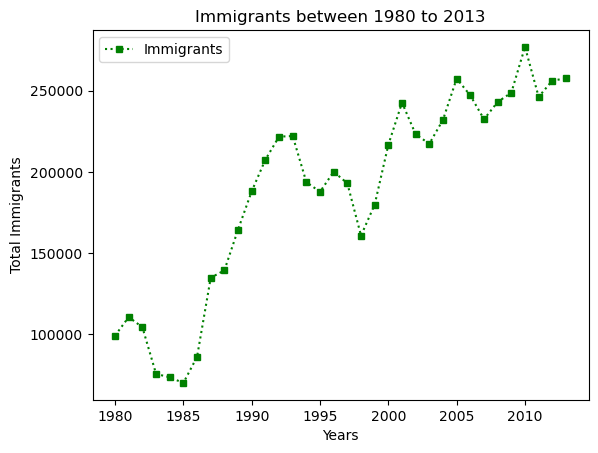

In [35]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Customizing the appearance of Plot
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line
#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

#### Let's include the background grid, a legend and try to change the limits on the axis

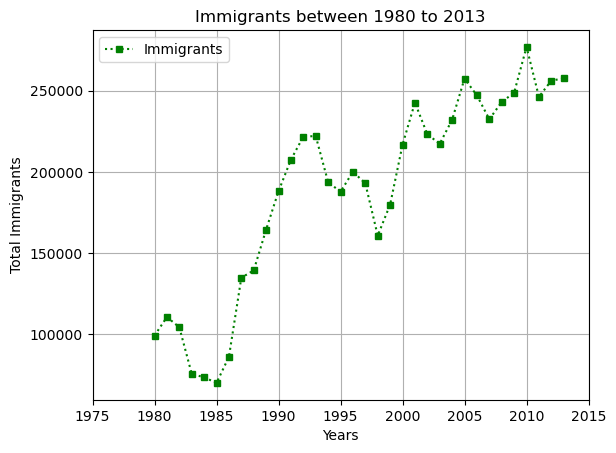

In [38]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

#Display the plot
plt.show()

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

### Question: Plot a line graph of immigration from Haiti 

You be required to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013<br> Also you will be required to transpose the new dataframe in to a series for plotting<br>Might also have to change the type of index of the series to integer for a better look of the plot<br> Then create fig and ax and call function plot() on the data.

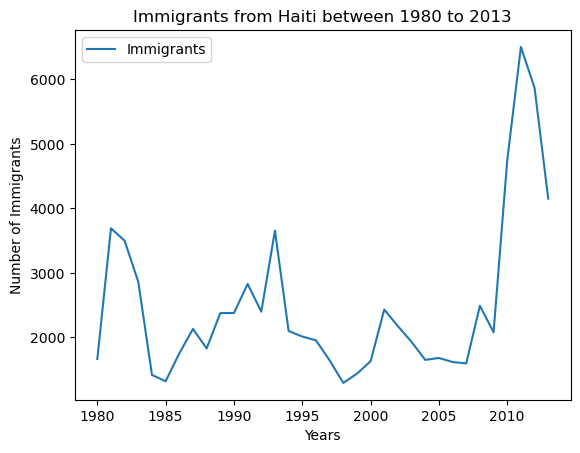

In [42]:
    #Creating data for plotting
    df_can.reset_index(inplace=True)
    haiti=df_can[df_can['Country']=='Haiti']

    #creating haiti with only years columns from 1980 - 2013 
    #and transposing to get the result as a series
    haiti=haiti[years].T

    #converting the index to type integer
    haiti.index = haiti.index.map(int)
    
    #Plotting the line plot on the data
    fig, ax = plt.subplots()
    ax.plot(haiti)
    #Setting up the Title
    ax.set_title('Immigrants from Haiti between 1980 to 2013') 
    #Setting up the Labels
    ax.set_xlabel('Years')
    ax.set_ylabel('Number of Immigrants')
    #Enabling Grid
    #plt.grid(True)  #or ax.grid()
    #Legend
    plt.legend(["Immigrants"]) #or ax.legend()
    #Display the plot
    plt.show()

#### We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. <br>Let's annotate this spike in the plot by using the *ax.annotate()* method.

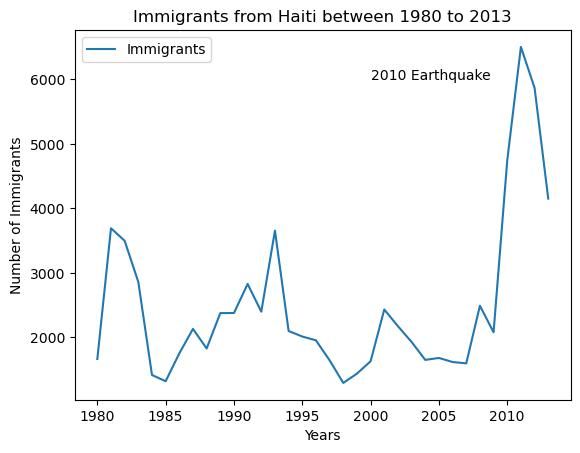

In [47]:
fig, ax = plt.subplots()

ax.plot(haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

#Enabling Grid and ticks
#plt.grid(True)  #or ax.grid()
#ax.set_xticks(list(range(n, m, s)))

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

ax.annotate('2010 Earthquake',xy=(2000, 6000))
plt.show()

You can also specify the ticks to be displayed on the plot like this - ax.set_xticks(list(range(1980, 2015,5)))

<hr>
<hr>

# Scatter Plot<a id="8"></a>

A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.<br><br>Let's created a *Scatter plot* to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a scatter plot directly on **ax** by calling plot function **scatter()**

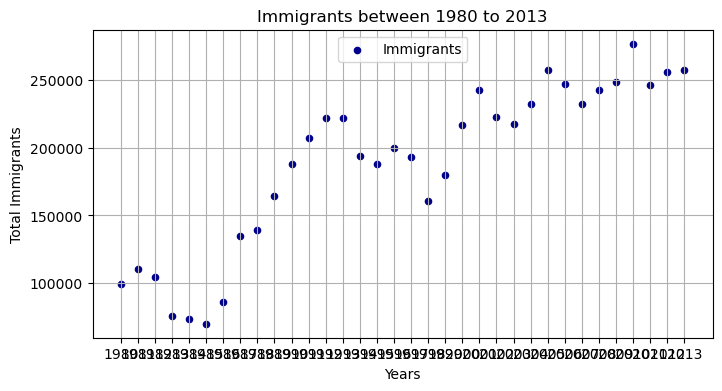

In [55]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Customizing Scatter Plot 
ax.scatter(years, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

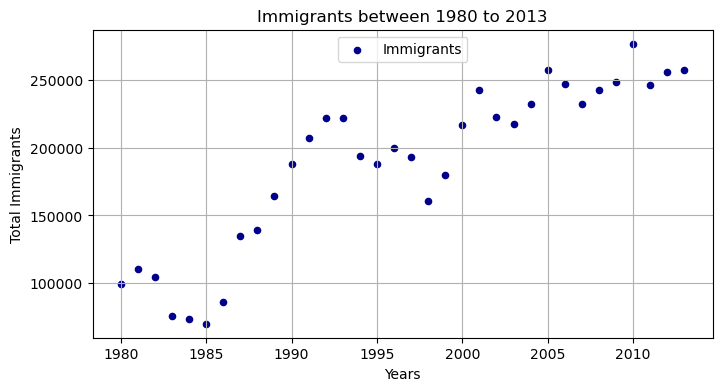

In [57]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

### Refer to the [matplotlib documentation](https://matplotlib.org/stable/api/markers_api.html) and change the marker and its size, color in the above code to see the difference in the appearance of the plot

<hr>
<hr>